## Exercise 2 

## Linear Regression

*In this exercise, we work on the two datasets containing train and test datasets*

In [1]:
import numpy as np
data1=np.loadtxt("lin_reg_train.txt")
data2=np.loadtxt("lin_reg_test.txt")
Xtrain=data1[:,0]
Ytrain=data1[:,1]
Xtest=data2[:,0]
Ytest=data2[:,1]
def x_bar(x):
    return np.hstack(([1],x))# adding the b i a s

*We build the weights using the closed form solution of weight matrix*

In [6]:
def Estimate_W(X , Y ) :
    
    X=np.vstack(([x_bar(X) for x in X]))# c r e a t i n g our Matrix
    n=X.shape[1] # we need i t to c r e a t e the r e g u l a r i z a t i o n term
    XT=np.transpose(X)
    r=np.dot(XT,X)+0.01*np.identity(n)
    W=np.linalg.inv(r).dot(XT).dot(Y)
    error=(X.dot(W)-Y)**2
    rms=np.sqrt(error.mean())
    return rms,W

In [7]:
Estimate_W(Xtrain,Ytrain)

(0.462125396901633,
 array([ 0.04740039,  0.0161103 ,  0.0433588 ,  0.01931497, -0.04578041,
        -0.04058548, -0.01427152,  0.04195414,  0.0188749 , -0.04734447,
         0.02195106,  0.04023151, -0.03761396,  0.03686314,  0.03906733,
        -0.04096099,  0.04096554,  0.01588139,  0.04306369, -0.04410169,
         0.04730746,  0.03926016, -0.01660384, -0.01917413,  0.0223357 ,
         0.02340402,  0.01523799, -0.03945195,  0.01783951, -0.04595979,
        -0.0192821 ,  0.03856327, -0.02363279, -0.02351942, -0.04236982,
         0.01894664,  0.0444894 , -0.02070892,  0.04314741, -0.01654505,
         0.04509496, -0.02245419,  0.03952714,  0.01396038, -0.03738971,
         0.01238172, -0.02162156,  0.01630873,  0.0146668 ,  0.01605446,
         0.03925511]))

In [4]:
Estimate_W(Xtest,Ytest)

0.42132130243290417

*The weights of the linear equation can be found from the closed form solution*

In [19]:
import numpy as np
data1=np.loadtxt('lin_reg_train.txt')
data2=np.loadtxt('lin_reg_test.txt')
Xtrain=data1[:,0]
Ytrain=data1[:,1]
Xtest=data2[:,0]
Ytest=data2[:,1]
def transform(X):
    a=np.ones(50)
    a=np.array(a)
    a2=2*np.ones(50)
    a2=np.array(X)
    a3=np.square(X)
    a4=np.power(a2,3)
    p=np.vstack((a , X , a3 , a4))
    a5=np.power(a2 , 4 )
    p=np.vstack((a,X,a3,a4,a5))
    p=p.T
    return p

def Estimate_W (X , Y ) :

    X=transform(X)
    n=X.shape[1] # we need i t to c r e a t e the r e g u l a r i z a t i o n term
    XT=np.transpose(X)
    r=np.dot(XT , X)+0.01*np.identity(n)
    W=np.linalg.inv(r).dot(XT).dot(Y) #weights from the closed form solution
    error=(X.dot(W)-Y)**2
    rms=np.sqrt(error.mean())
    return rms , W

*We build a polynomial regression with degree 4 with the weights we got earlier*

[ 0.75228728 -1.10393244  0.91038485  1.11271341  0.10347984]


Text(0, 0.5, 'Corresponding Y values')

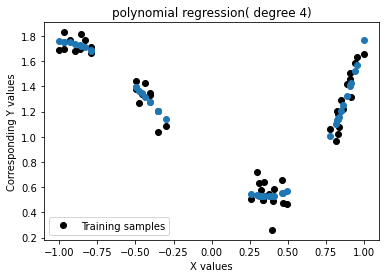

In [21]:
Estimate_W(Xtrain , Ytrain )
import matplotlib.pyplot as plt
plt.plot(Xtrain , Ytrain , 'o', color= 'black',label= 'Training samples')
rms ,W=Estimate_W(Xtrain , Ytrain)
print(W)
plt.plot(Xtrain ,W[0]+ Xtrain*W[1]+( Xtrain*Xtrain )*W[2]+(( Xtrain )**3)*W[3]+( Xtrain **4)*W[4] , 'o' )
plt.title("polynomial regression( degree 4)")
plt.legend()
plt.xlabel("X values")
plt.ylabel("Corresponding Y values")

## Bayesian Linear Regresssion

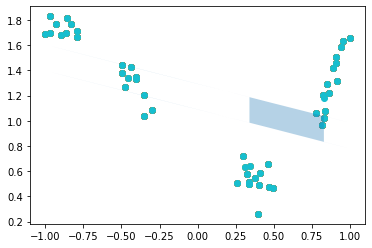

In [40]:
import numpy as np
import matplotlib.pyplot as plt
data1=np.loadtxt("lin_reg_train.txt")
data2=np.loadtxt("lin_reg_test.txt")
Xtrain=data1[:,0]
Ytrain=data1[:,1]
Xtest=data2[:,0]
Ytest=data2[:,1]
a=np.ones(50)
a=np.array(a)
p=np.vstack((a,Xtrain ))
p=np.matrix(p)
x_tr=p.T
m0=np.matrix([0 ,0])
cov0=np.matrix([[0.01 ,0 ] ,[0 ,0.01] ])
cov0=np.linalg.inv(cov0)
mean_pred=[]
var_pred=[]

for i in range(50):
    s=np.dot((x_tr[i].T),x_tr[i])
    cov1=np.linalg.inv(cov0)+100*(s)
    cov_inv=np.linalg.inv(cov1)
    m1=np.dot(np.linalg.inv(cov0),m0.T)+100*np.dot(x_tr[i].T, Ytrain[i])
    m1=np.dot(cov_inv,m1)
    m1=np.array(m1)
    #plt.plot(Xtrain,m1[0]+ Xtrain*m1[1])
    plt.scatter(Xtrain[0:i+1], Ytrain[0:i+1])
    cov0=cov_inv.copy()
    m0=m1.copy()
    m0=m0.T

    
for i in range(50):
    mean_test=np.dot(m1.T , x_tr[i].T)
    temp=np.dot(x_tr[i] ,cov_inv)
    var=(1/100)+np.dot(temp,x_tr[i].T)
    var=np.sqrt(var)
    mean_pred.append(np.linalg.det(mean_test))
    var_pred.append(np.linalg.det(var))

mean_pred=np.array(mean_pred)
a1=mean_pred-var_pred
a2=mean_pred+var_pred
plt.fill_between(Xtrain ,a1,a2 ,alpha =0.33, label= "Uncertainty Interval ($\mu\pm3\sigma)")
plt.show()

## Linear Discrimant Analysis

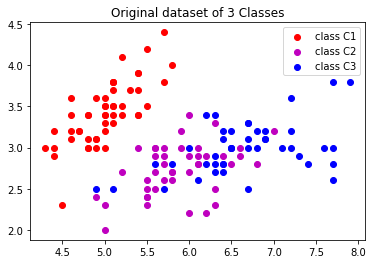

In [41]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt("ldaData.txt")
array_x_ =[]
array_y_ =[]
array_x1 =[]
array_y1 =[]
array_x2 =[]
array_y2 =[]
array_x3 =[]
array_y3 =[]
for i in range(0 ,137):
    array_x_.append(data[i,0 ])
    array_y_.append(data[i,1 ])
for i in range (0 ,50):
    array_x1.append(data[i,0])
    array_y1.append(data[i,1])
for i in range (50 ,93):
    array_x2.append(data[i,0])
    array_y2.append(data[i,1])
for i in range (93 ,137):
    array_x3.append(data[i,0])
    array_y3.append(data[i,1])

plt.scatter(array_x1,array_y1,color= "r" , label= "class C1")
plt.scatter(array_x2,array_y2,color= "m", label="class C2")
plt.scatter(array_x3,array_y3,color= "b" , label= "class C3")
plt.legend()
plt.title("Original dataset of 3 Classes")
plt.show()

p1=np.zeros(50)
p2=np.zeros(43)
p3=np.zeros(44)

def s_b_test(mu1,mu2, mu_1_total , mu_2_total):
    s_b_1=np . zeros ((2 ,2))
    a=np.matrix([[mu1-mu_1_total ] ,[mu2-mu_2_total ]])
    s_b_1=np.dot(a, a.T)
    return s_b_1

In [32]:
def s_w_test(x1,x2,mu1,mu2):
    s_w_1=np.zeros((2 ,2))
    for i in range(len(x1)):
        a=np.matrix([[x1[i]-mu1],[x2[i]-mu2]])
        s_w_1+=np.dot(a,a.T)
    return s_w_1
mu11=np.mean(array_x1)
mu12=np.mean(array_y1)
mu21=np.mean(array_x2)
mu22=np.mean(array_y2)
mu31=np.mean(array_x3)
mu32=np.mean(array_y3)
mu1=np.mean(array_x_)
mu2=np.mean(array_y_)
s1=s_w_test(array_x1,array_y1 ,mu11,mu12)
s2=s_w_test(array_x2,array_y2 ,mu21,mu22)
s3=s_w_test(array_x3,array_y3 ,mu31,mu32)
s4=s1+s2+s3
sb1=50*s_b_test(mu11, mu12,mu1,mu2)
sb2=43*s_b_test(mu21, mu22,mu1,mu2)
sb3=44*s_b_test(mu31, mu32,mu1,mu2)
sb_=sb1+sb2+sb3
final1=np.dot(np.linalg.inv(s4),sb_)

#we find the eigen vectors and eigen values of the data
eigen_value , eigen_vector=np.linalg.eig(final1)
eigen_v11=eigen_vector[0 ,0]
eigen_v12=eigen_vector[1 ,0]
eigen_v21=eigen_vector[0 ,1]
eigen_v22=eigen_vector[1 ,1]
y_x1=[]
y_y1=[]
y_x2=[]
y_y2=[]
y_x3=[]
y_y3=[]
for i in range ( len ( array_x1 ) ) :
    y_x1.append(eigen_v11*array_x1[ i ]+eigen_v12*array_y1[ i ])
    y_y1.append(eigen_v21*array_x1[ i ]+eigen_v22*array_y1[ i ])
for i in range ( len ( array_x2 ) ) :
    y_x2.append(eigen_v11*array_x2[ i ]+eigen_v12*array_y2[ i ])
    y_y2.append(eigen_v21*array_x2[ i ]+eigen_v22*array_y2[ i ])

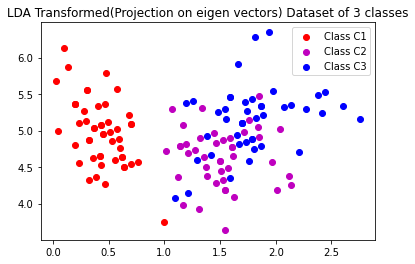

In [33]:
for i in range(len(array_x3)):
    y_x3.append(eigen_v11*array_x3[i]+eigen_v12*array_y3[i])
    y_y3.append(eigen_v21*array_x3[i]+eigen_v22*array_y3[i])
plt.scatter(y_x1, y_y1, color= "r" , label= "Class C1")
plt.scatter(y_x2, y_y2, color= "m" , label= "Class C2")
plt.scatter(y_x3, y_y3, color= "b" , label= "Class C3")
plt.legend()
plt.title("LDA Transformed(Projection on eigen vectors) Dataset of 3 classes")
plt.show()

*we find the gaussian distribution of the data for all the classess*

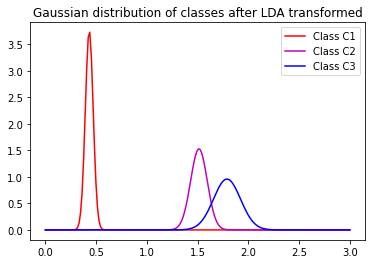

In [35]:
def gauss1(mean,var, x):
    a=1/(np.sqrt(2*np.pi*(var)**2))
    b=np.exp(-((x-mean)**2)/(2*( var )**2))
    p=a*b
    return p

mean1=np.mean(y_x1)
mean2=np.mean(y_x2)
mean3=np.mean(y_x3)
variance1=np.var(y_x1)
variance2=np.var(y_x2)
variance3=np.var(y_x3)
pc1=50/137
pc2=43/137
pc3=44/137

array=np.linspace(0,3,200)
p1=[]
p2=[]
p3=[]
for i in range (0 ,200):
    p1.append(gauss1(mean1, variance1, array[i]))
    p2.append(gauss1(mean2, variance2, array[i]))
    p3.append(gauss1(mean3, variance3, array[i]))
post11=[]
post22=[]
post33=[]

for i in range (0 ,200):
    a1=p1[ i ]*pc1
    a2=p2[ i ]*pc2
    a3=p3[ i ]*pc3
    post11.append(a1)
    post22.append(a2)
    post33.append(a3)

plt.plot(array , post11 , color= "r", label= "Class C1")
plt.plot(array,post22,color= "m", label= "Class C2")
plt.plot(array,post33,color= "b" , label= "Class C3" )
plt.title("Gaussian distribution of classes after LDA transformed")
plt.legend()
plt.show()

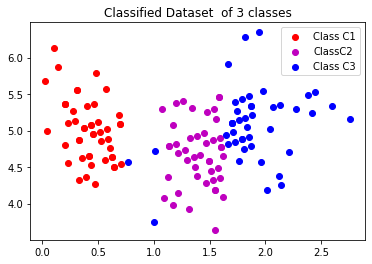

In [38]:
p1_x=[]
p2_x=[]
p3_x=[]
p1_y=[]
p2_y=[]
p3_y=[]
for i in range(len(y_x1)):
    a1=(gauss1(mean1,variance1,y_x1[i]))*pc1
    a2=(gauss1(mean2,variance2,y_x1[i]))*pc2
    a3=(gauss1(mean3,variance3,y_x1[i]))*pc3
    if(a1>a2)&(a1>a3 ) :
        p1_x.append(y_x1[i])
        p1_y.append(y_y1[i])
    elif(a2>a3):
        p2_x.append(y_x1[i])
        p2_y.append(y_y1[i])
    elif(a3>a2):
        p3_x.append(y_x1[i])
        p3_y.append(y_y1[i])

for i in range ( len ( y_x2 ) ) :
    a1=(gauss1(mean1,variance1,y_x2 [ i ]))*pc1
    a2=(gauss1(mean2,variance2,y_x2 [ i ]))*pc2
    a3=(gauss1(mean3,variance3,y_x2 [ i ]))*pc3
    if(a1>a2)&(a1>a3):
        p1_x.append(y_x2[i])
        p1_y.append(y_y2[i])
    elif(a2>a3):
        p2_x.append(y_x2[i])
        p2_y.append(y_y2[i])
    elif(a3>a2):
        p3_x.append(y_x2[i])
        p3_y.append(y_y2[i])
for i in range(len(y_x3)):
    a1=(gauss1(mean1,variance1,y_x3[i]))*pc1
    a2=(gauss1(mean2,variance2,y_x3[i]))*pc2
    a3=(gauss1(mean3,variance3,y_x3[i]))*pc3
    if(a1>a2)&(a1>a3):
        p1_x.append(y_x3[i])
        p1_y.append(y_y3[i])
    elif(a2>a3 ) :
        p2_x.append(y_x3[i])
        p2_y.append(y_y3[i])
    elif(a3>a2):
        p3_x . append ( y_x3 [ i ])
        p3_y . append ( y_y3 [ i ])

plt.scatter(p1_x,p1_y,color="r" , label= "Class C1")
plt.scatter(p2_x,p2_y,color="m", label= "ClassC2")
plt.scatter(p3_x,p3_y,color="b" , label= "Class C3")
plt.legend()
plt.title("Classified Dataset  of 3 classes")
plt.show()

## PCA

*We do the pca on the dataset and show the pca transformed data looks in the dataset*

Cumulative sum of eigen values : [0.91758513 0.97708539 0.99500656 1.        ]


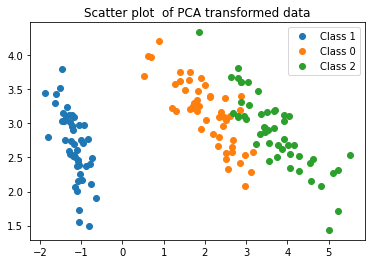

In [39]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt("iris.txt", delimiter=",")
d1=(data[: ,0]-np.mean(data[:,0]))/np.std(data[:,0])
d2=(data[: ,1])-np.mean(data[:,1])/np.std(data[:,1])
d3=(data[: ,2])-np.mean(data[:,2])/np.std(data[:,2])
d4=(data[: ,3])-np.mean(data[:,3])/np.std(data[:,3])

data33=np.vstack((d1,d2,d3,d4))
data33=data33.T

cov1=np.cov(data33.T)
cov1=cov1.T

eigenvalues , eigenvector=np.linalg.eig(cov1)
p=(eigenvalues/np.sum(eigenvalues))
print("Cumulative sum of eigen values :",np.cumsum(p))
final1=np.dot(data33,eigenvector[:,0:2])

plt.plot(final1[0:50 ,0] , final1[0:50 ,1] , "o", label= "Class 1")
plt.plot(final1[50:100 ,0] , final1[50:100 ,1] , "o" , label= "Class 0")
plt.plot(final1[100:150 ,0] , final1[100:150 ,1] , "o" , label= "Class 2")
plt.title( "Scatter plot  of PCA transformed data")
plt.legend()